# SSA-BLS

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
# import matplotlib.ticker as ticker
# import matplotlib.ticker as mtick
import random
import time

from SSA import SSA
from BLS_Regression import bls_regression
from BLS_Regression2 import bls_regression2  # for drawing

from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics

from solution import solution
from elm_code import ELM
import elm
import hpelm
import optunity
import optunity.cross_validation
import optunity.metrics
from scipy.io import loadmat


## Load data

### main dataset

In [2]:
## main data
data = pd.read_csv('DATASET/guolu.csv')
data = data.iloc[:10000,:]
print(data.shape)

labelsNOX = np.array(data.loc[:,'6CEMSNOX'])
labelsSO2 = np.array(data.loc[:,'6CEMSSO2'])
labelsHE = np.array(data.loc[:,'Thermal efficiency'])
data= np.array(data.drop(['6CEMSNOX','6CEMSSO2','Thermal efficiency'] ,axis = 1))

labels = labelsHE  # labelsNOX / labelsSO2
labels = labels.reshape(-1, 1)

scaler = MinMaxScaler()
data = scaler.fit_transform(data)
labels = scaler.fit_transform(labels)

train_x, test_x, train_y, test_y = train_test_split(data, labels, test_size = 0.3, random_state = 520)
print(train_x.shape)
print(test_x.shape)

(10000, 30)
(7000, 27)
(3000, 27)


### 8 datasets used to test performance

In [5]:
## 1 autompg
data_autompg=loadmat('DATASET/autompg.mat')
data = data_autompg['autompg']
print(data.shape)

data = pd.DataFrame(data)
data = data.dropna()
data = np.array(data)

labels = data[:,1]
data = data[:,1:]

scaler = MinMaxScaler()
labels = labels.reshape(-1, 1)
labels = scaler.fit_transform(labels)

data = scaler.fit_transform(data)

train_x, test_x, train_y, test_y = train_test_split(data, labels, test_size = 0.3, random_state = 520)
print(train_x.shape)
print(test_x.shape)

(398, 7)
(274, 6)
(118, 6)


In [6]:
## 2 abalone
data_abalone=loadmat('DATASET/abalone.mat')
data = data_abalone['abalone']
print(data.shape)

labels = data[:,1]
labels = labels.reshape(-1, 1)
data = data[:,1:]

scaler = MinMaxScaler()
data = scaler.fit_transform(data)
labels = scaler.fit_transform(labels)

train_x, test_x, train_y, test_y = train_test_split(data, labels, test_size = 0.3, random_state = 520)
print(train_x.shape)
print(test_x.shape)

(4177, 9)
(2923, 8)
(1254, 8)


In [7]:
## 3 bank
data_autompg=loadmat('DATASET/bank1.mat')
data = data_autompg['bank1']
print(data.shape)
data = pd.DataFrame(data)
data = data.dropna()
data = np.array(data)

labels = data[:,1]
data = data[:,1:]
scaler = MinMaxScaler()
labels = labels.reshape(-1, 1)
data = scaler.fit_transform(data)
labels = scaler.fit_transform(labels)

train_x, test_x, train_y, test_y = train_test_split(data, labels, test_size = 0.3, random_state = 520)
print(train_x.shape)
print(test_x.shape)

(4500, 9)
(3149, 8)
(1350, 8)


In [8]:
## 4 bostonhousing
data_bostonhousing=loadmat('DATASET/bostonhousing.mat')
data = data_bostonhousing['bostonhousing']
print(data.shape)

labels = data[:,1]
data = data[:,1:]
scaler = MinMaxScaler()
labels = labels.reshape(-1, 1)
data = scaler.fit_transform(data)
labels = scaler.fit_transform(labels)

train_x, test_x, train_y, test_y = train_test_split(data, labels, test_size = 0.3, random_state = 520)
print(train_x.shape)
print(test_x.shape)

(506, 14)
(354, 13)
(152, 13)


In [9]:
## 5 deltaelevators
data_deltaelevators=loadmat('DATASET/deltaelevators.mat')
data = data_deltaelevators['deltaelevtors']
print(data.shape)

labels = data[:,1]
data = data[:,1:]
scaler = MinMaxScaler()
labels = labels.reshape(-1, 1)
data = scaler.fit_transform(data)
labels = scaler.fit_transform(labels)

train_x, test_x, train_y, test_y = train_test_split(data, labels, test_size = 0.3, random_state = 520)
print(train_x.shape)
print(test_x.shape)

(9517, 7)
(6661, 6)
(2856, 6)


In [10]:
## 6 forestfires
data_forestfires=loadmat('DATASET/forestfires.mat')
data = data_forestfires['forestfires']
print(data.shape)

labels = data[:,1]
data = data[:,1:]

scaler = MinMaxScaler()
labels = labels.reshape(-1,1)
data = scaler.fit_transform(data)
labels = scaler.fit_transform(labels)

train_x, test_x, train_y, test_y = train_test_split(data, labels, test_size = 0.3, random_state = 520)

print(train_x.shape)
print(test_x.shape)

(517, 13)
(361, 12)
(156, 12)


In [11]:
## 7 machinecpu
data_machinecpu=loadmat('DATASET/machinecpu.mat')
data = data_machinecpu['machinecpu']
print(data.shape)

labels = data[:,1]
labels = labels.reshape(-1, 1)
data = data[:,1:]
scaler = MinMaxScaler()
data = scaler.fit_transform(data)
labels = scaler.fit_transform(labels)

train_x, test_x, train_y, test_y = train_test_split(data, labels, test_size = 0.3, random_state = 520)
print(train_x.shape)
print(test_x.shape)

(209, 7)
(146, 6)
(63, 6)


In [34]:
## 8 servo
data_servo=loadmat('DATASET/servo.mat')
data = data_servo['servo']
print(data.shape)

labels = data[:,1]
data = data[:,1:]
scaler = MinMaxScaler()
labels = labels.reshape(-1, 1)
data = scaler.fit_transform(data)
labels = scaler.fit_transform(labels)

train_x, test_x, train_y, test_y = train_test_split(data, labels, test_size = 0.3, random_state = 520)
print(train_x.shape)
print(test_x.shape)

(167, 5)
(116, 4)
(51, 4)


## 1 BLS parameter optimization and cross-validation

### 1.1 SSA-BLS

[[  5.  39. 108.]
 [ 17.  24. 459.]
 [ 19.  30. 105.]
 [  5.  11. 324.]
 [ 15.   1. 455.]
 [  6.  20. 392.]
 [ 10.  24. 139.]
 [  9.   4. 262.]
 [  4.  40. 385.]
 [  9.  30. 295.]
 [ 15.  13.  69.]
 [ 18.  27. 446.]
 [ 14.  32. 218.]
 [ 18.   5. 187.]
 [ 18.  16. 234.]
 [  2.  12.  25.]
 [ 12.   4. 403.]
 [ 20.  37. 235.]
 [  8.  24. 451.]
 [ 12.  17. 264.]]
['At iteration 1 the best fitness is [0.0125191]']
[2, 40, 1]
Cumulative_time: 188.79137992858887
['At iteration 2 the best fitness is [0.0125191]']
[2, 40, 1]
Cumulative_time: 275.06304836273193
['At iteration 3 the best fitness is [0.0104634]']
[1, 19, 500]
Cumulative_time: 364.6500778198242
['At iteration 4 the best fitness is [0.00712207]']
[2, 19, 302]
Cumulative_time: 426.70970726013184
['At iteration 5 the best fitness is [0.00712207]']
[2, 19, 302]
Cumulative_time: 495.48641443252563
['At iteration 6 the best fitness is [0.00712207]']
[2, 19, 302]
Cumulative_time: 573.3848149776459
['At iteration 7 the best fitness is [0.00

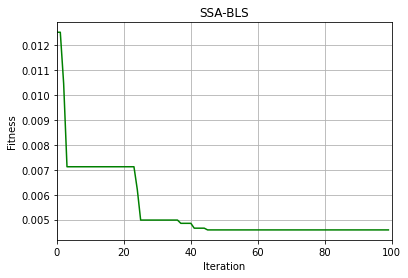

In [3]:
seed = 150
pop = 20    # population size
MaxIter = 100   # Number of iterations
dim = 3      # dimension
lb = 1*np.ones([dim,1])     # Lower boundary of N1
ub = 20*np.ones([dim,1])    # Upper boundary of N1
lb[1] = 1   # Lower boundary of N2
ub[1] = 40  # Upper boundary of N3
lb[2] = 1   # Lower boundary of N3
ub[2] = 500 # Upper boundary of N3

fobj = bls_regression 

s = 0.8  # Shrinkage coefficient
c = 2**-30 # Regularization coefficient

time_start = time.time()
result,Curve2,iterPosition,firstPositions = SSA(fobj, lb, ub, dim, pop, MaxIter, s,c,train_x,train_y,test_x,test_y,seed,data,labels)
time_end = time.time()
BestPosition = [int(i) for i in result.bestIndividual]
SearchingTime = time_end - time_start

print('------Results of sparrow search------')
print('Optimal fitness value:',1/result.best)
print('Best solution:', BestPosition)
print('Searching time: %.2f s'%SearchingTime)

Curve_SSA = result.convergence

plt.figure(1)
plt.plot(1/Curve_SSA,color = 'g')
plt.xlabel('Iteration',fontsize='medium')
plt.xlim(0,MaxIter)
plt.ylabel("Fitness",fontsize='medium')
plt.grid()
plt.title('SSA-BLS',fontsize='large')
plt.show()

### 1.2 Find the optimal parameters of BLS by nested cross-validation

In [5]:
@optunity.cross_validated(x=data, y=labels, num_folds=5)
def nested_cv(x_train, y_train, x_test, y_test):

    # inner cross-validation to estimate performance of a set of hyperparameters
    @optunity.cross_validated(x=x_train, y=y_train, num_folds=10, num_iter=2)
    def inner_cv(x_train, y_train, x_test, y_test, NumFea, NumWin,NumEnhan):

        test_RR2, test_MSE, test_MAPE,train_RR2,train_MSE2,Training_time = bls_regression(x_train,y_train,x_test,y_test,0.8,2**-30,NumFea,NumWin,NumEnhan)

        return test_MSE

    hpars, info, _ = optunity.minimize(inner_cv, num_evals=20,
                                    NumFea=[1, 20], NumWin=[1, 40],NumEnhan=[1,500])
    print('')
    print('Hyperparameters: ' + str(hpars))
    print('Cross-validated RMSE after tuning: %1.7f' % info.optimum)

    print(int(hpars['NumFea']),int(hpars['NumWin']),int(hpars['NumEnhan']))
    test_RR2, test_MSE, test_MAPE,train_RR2,train_MSE2,Training_time = bls_regression(x_train,y_train,x_test,y_test,0.8,2**-30,hpars['NumFea'],hpars['NumWin'],hpars['NumEnhan'])

    return test_MSE 

test_MSE = nested_cv()
print('')
print('BLS Nested RMSE: %1.7f' % test_MSE)


Hyperparameters: {'NumFea': 2.6861846103846103, 'NumWin': 17.619388104782022, 'NumEnhan': 305.8785983149708}
Cross-validated RMSE after tuning: 0.0077111
2 17 305

Hyperparameters: {'NumFea': 13.452167483296048, 'NumWin': 20.78307343976156, 'NumEnhan': 9.695570448108668}
Cross-validated RMSE after tuning: 0.0124977
13 20 9

Hyperparameters: {'NumFea': 2.5308861354507917, 'NumWin': 39.579552566754444, 'NumEnhan': 158.21484067249418}
Cross-validated RMSE after tuning: 0.0066449
2 39 158

Hyperparameters: {'NumFea': 12.612996844098502, 'NumWin': 27.11429421142714, 'NumEnhan': 7.47304434308157}
Cross-validated RMSE after tuning: 0.0125255
12 27 7

Hyperparameters: {'NumFea': 2.466705836160624, 'NumWin': 28.07958640135202, 'NumEnhan': 162.1165042811245}
Cross-validated RMSE after tuning: 0.0059966
2 28 162

BLS Nested RMSE: 0.0096551


### 1.3 10-fold cross-validation of BLS

In [6]:
NumFea = BestPosition[0]
NumWin = BestPosition[1]
NumEnhan = BestPosition[2]
s = 0.8
C = 2**-30

RRL = []
train_RRL = []
RMSEL = []
train_RMSEL = []
MAPEL = []
train_MAPEL = []
KF = KFold(n_splits = 10, shuffle = True, random_state = 520)
for k, (train, test) in enumerate(KF.split(data, labels)):
    train_x1 = data[train]
    test_x1 = data[test]
    train_y1 = labels[train]
    test_y1 = labels[test]
    test_RR2, test_MSE, test_MAPE,train_RR2,train_MSE2,train_MAPE = bls_regression(train_x1,train_y1,test_x1,test_y1,s,C,NumFea,NumWin,NumEnhan)
    RRL.append(test_RR2)
    train_RRL.append(train_RR2)
    RMSEL.append(test_MSE)
    train_RMSEL.append(train_MSE2)
    MAPEL.append(test_MAPE)
    train_MAPEL.append(train_MAPE)


print('test_RMSE_mean:',np.mean(RMSEL))
print('train_RMSE_mean:',np.mean(train_RMSEL))
print('test_RMSE_variance:',np.std(RMSEL))
print('train_RMSE_variance:',np.std(train_RMSEL))

print('test_R2_mean:',np.mean(RRL))
print('train_R2_mean:',np.mean(train_RRL))

print('test_MAPE_mean:',np.mean(MAPEL))
print('train_MAPE_mean:',np.mean(train_MAPEL))

test_RMSE_mean: 0.004587652724808127
train_RMSE_mean: 0.00441464348286562
test_RMSE_variance: 0.00016441207983227248
train_RMSE_variance: 0.00017876094000721912
test_R2_mean: 0.9993980792845104
train_R2_mean: 0.9994462855025865
test_MAPE_mean: 0.2185641359747868
train_MAPE_mean: 0.21090142266478268


## 2 RELM parameter optimization and cross-validation

### 2.1 Find the optimal parameters of RELM by nested cross-validation

In [7]:
class RELM_HiddenLayer:

    def __init__(self, x, num, C=10):
        row = x.shape[0]
        columns = x.shape[1]
        rnd = np.random.RandomState()
        self.w = rnd.uniform(-1, 1, (columns, num))
        self.b = np.zeros([row, num], dtype=float)
        for i in range(num):
            rand_b = rnd.uniform(-0.4, 0.4)
            for j in range(row):
                self.b[j, i] = rand_b
        self.H0 = np.matrix(self.softplus(np.dot(x, self.w) + self.b))
        self.C = C
        self.P = (self.H0.H * self.H0 + len(x) / self.C).I

    @staticmethod
    def sigmoid(x):
        return 1.0 / (1 + np.exp(-x))

    @staticmethod
    def softplus(x):
        return np.log(1 + np.exp(x))

    @staticmethod
    def tanh(x):
        return (np.exp(x) - np.exp(-x))/(np.exp(x) + np.exp(-x))

    def regressor_train(self, T):
        all_m = np.dot(self.P, self.H0.H)
        self.beta = np.dot(all_m, T)
        return self.beta

    def regressor_test(self, test_x):
        b_row = test_x.shape[0]
        h = self.softplus(np.dot(test_x, self.w) + self.b[:b_row, :])
        result = np.dot(h, self.beta)
        return result
    
def calculate_rmse(NetoutTest,test_y):
    return np.mean(np.sqrt((NetoutTest-test_y).T*(NetoutTest-test_y)/test_y.shape[0]))

def mape(y_true, y_pred):
    return np.mean(np.abs((y_pred - y_true) / (y_true+1))) * 100

def my_RELM(train_x,train_y,test_x,test_y,i,C1):
    my_EML = RELM_HiddenLayer(train_x,num = i, C = C1)
    my_EML.regressor_train(train_y)
    y_out = my_EML.regressor_test(test_x)
    y_out_train = my_EML.regressor_test(train_x)
    RMSE_test = metrics.mean_squared_error(test_y, y_out)**0.5
    RMSE_train = metrics.mean_squared_error(train_y, y_out_train)**0.5
    
    MAPE_test = mape(test_y,y_out)
    MAPE_train = mape(train_y,y_out_train)
    
    R2_test = metrics.r2_score(test_y, y_out)
    R2_train = metrics.r2_score(train_y, y_out_train)

    return RMSE_test,RMSE_train,R2_test,R2_train,MAPE_test,MAPE_train

In [8]:
@optunity.cross_validated(x=data, y=labels, num_folds=5)
def nested_cv(x_train, y_train, x_test, y_test):

    @optunity.cross_validated(x=x_train, y=y_train, num_folds=10, num_iter=2)
    def inner_cv(x_train, y_train, x_test, y_test, C, num):
        RMSE_test,_,_,_,_,_ = my_RELM(train_x,train_y,test_x,test_y,int(num),C)
        return  RMSE_test

    hpars, info, _ = optunity.minimize(inner_cv, num_evals=10,C=[0, 100], num=[1,100])
    
    print('')
    print('Hyperparameters: ' + str(hpars))
    print('Cross-validated RMSE after tuning: %1.7f' % info.optimum)
    print(hpars['C'],int(hpars['num']))

    RMSE_test,_,_,_,_,_ = my_RELM(train_x,train_y,test_x,test_y,int(hpars['num']),hpars['C'])
    return RMSE_test

RMSE = nested_cv()
print('---KELM---')
print('Nested RMSE: %1.7f' % RMSE)


Hyperparameters: {'C': 38.44984987540396, 'num': 80.10063394597913}
Cross-validated RMSE after tuning: 0.0135957
38.44984987540396 80

Hyperparameters: {'C': 22.821118689213815, 'num': 98.8699440356929}
Cross-validated RMSE after tuning: 0.0112727
22.821118689213815 98

Hyperparameters: {'C': 94.56450497041644, 'num': 97.80778217233465}
Cross-validated RMSE after tuning: 0.0110125
94.56450497041644 97

Hyperparameters: {'C': 89.77873586900537, 'num': 94.60423451433873}
Cross-validated RMSE after tuning: 0.0111334
89.77873586900537 94

Hyperparameters: {'C': 16.529628678939858, 'num': 94.27436031594954}
Cross-validated RMSE after tuning: 0.0113867
16.529628678939858 94
---KELM---
Nested RMSE: 0.0118946


### 2.2 10-fold cross-validation of RELM

In [10]:
## choose the best parameters from neated cross-validation
C = 94.5645
num = 97

RRL = []
train_RRL = []
RMSEL = []
train_RMSEL = []
MAPEL = []
train_MAPEL = []
KF = KFold(n_splits = 10, shuffle = True, random_state = 520)
for k, (train, test) in enumerate(KF.split(data, labels)):
    train_x1 = data[train]
    test_x1 = data[test]
    train_y1 = labels[train]
    test_y1 = labels[test]
    
    RMSE_test,RMSE_train,R2_test,R2_train,MAPE_test,MAPE_train= my_RELM(train_x,train_y,test_x,test_y,num,C)
    
    RRL.append(R2_test)
    train_RRL.append(R2_train)
    RMSEL.append(RMSE_test)
    train_RMSEL.append(RMSE_train)
    MAPEL.append(MAPE_test)
    train_MAPEL.append(MAPE_train)

print('test_RMSE_mean:',np.mean(RMSEL))
print('train_RMSE_mean:',np.mean(train_RMSEL))
print('test_RMSE_variance:',np.std(RMSEL))
print('train_RMSE_variance:',np.std(train_RMSEL))


print('test_R2_mean:',np.mean(RRL))
print('train_R2_mean:',np.mean(train_RRL))

print('test_MAPE_mean:',np.mean(MAPEL))
print('train_MAPE_mean:',np.mean(train_MAPEL))

test_RMSE_mean: 0.010474778442061641
train_RMSE_mean: 0.01042420860789674
test_RMSE_variance: 0.001449841131719638
train_RMSE_variance: 0.0014413920163556804
test_R2_mean: 0.9967517400350114
train_R2_mean: 0.9968894337126638
test_MAPE_mean: 0.5165789018563827
train_MAPE_mean: 0.512814631192418


## 3 KELM parameter optimization and cross-validation

### 3.1 Find the optimal parameters of KELM by nested cross-validation

In [11]:
def mape(y_true, y_pred):
    return np.mean(np.abs((y_pred - y_true) / (y_true+1))) * 100

def KELM(train_x,train_y,test_x,test_y,C,gamma):
    data_new = np.hstack((labels,data))
    elmk = elm.ELMKernel(['rbf',C, [gamma]])
    tr_set = np.hstack((np.array(train_y),np.array(train_x)))
    te_set = np.hstack((np.array(test_y),np.array(test_x)))
    tr_result = elmk.train(tr_set)
    te_result = elmk.test(te_set)
    Expeted = te_result.expected_targets
    Predicted = te_result.predicted_targets
    RMSE_test = te_result.get_rmse()
    MAPE_test = mape(Expeted,Predicted)
    R2_test = metrics.r2_score(Expeted, Predicted)
    
    Expeted_train = tr_result.expected_targets
    Predicted_train = tr_result.predicted_targets
    
    MAPE_train = mape(Expeted_train,Predicted_train)
    RMSE_train = tr_result.get_rmse()
    R2_train = metrics.r2_score(Expeted_train, Predicted_train)
    
    return R2_test,RMSE_test,MAPE_test,R2_train,RMSE_train,MAPE_train  


In [ ]:
@optunity.cross_validated(x=data, y=labels, num_folds=5)
def nested_cv(x_train, y_train, x_test, y_test):

    # inner cross-validation to estimate performance of a set of hyperparameters
    @optunity.cross_validated(x=x_train, y=y_train, num_folds=10, num_iter=2)
    def inner_cv(x_train, y_train, x_test, y_test, C, logGamma):
        
        tr_set = np.hstack((np.array(y_train),np.array(x_train)))
        te_set = np.hstack((np.array(y_test),np.array(x_test)))
        elmk = elm.ELMKernel(['rbf',C, [logGamma]])
        tr_result = elmk.train(tr_set)
        te_result = elmk.test(te_set)
        RMSE = te_result.get_rmse()
        Expeted = te_result.expected_targets
        Predicted = te_result.predicted_targets
        R2_KELM = metrics.r2_score(Expeted, Predicted)
        return  RMSE

    hpars, info, _ = optunity.minimize(inner_cv, num_evals=10, C=[0, 30], logGamma=[-15, 1])
    print('')
    print('Hyperparameters: ' + str(hpars))
    print('Cross-validated RMSE after tuning: %1.7f' % info.optimum)

    tr_set = np.hstack((np.array(y_train),np.array(x_train)))
    te_set = np.hstack((np.array(y_test),np.array(x_test)))
    print(hpars['C'],hpars['logGamma'])
    elmk = elm.ELMKernel(['rbf',hpars['C'], [hpars['logGamma']]])
    tr_result = elmk.train(tr_set)
    te_result = elmk.test(te_set)
    RMSE = te_result.get_rmse()
    Expeted = te_result.expected_targets
    Predicted = te_result.predicted_targets
    R2_KELM = metrics.r2_score(Expeted, Predicted)
    return RMSE  

RMSE = nested_cv()
print('---KELM---')
print('Nested RMSE: %1.7f' % RMSE)

### 3.2 10-fold cross-validation of KELM

In [31]:
## choose the best parameters from neated cross-validation
C = 8.9284
gamma = -3.0916

RRL = []
train_RRL = []
RMSEL = []
train_RMSEL = []
MAPEL = []
train_MAPEL = []
KF = KFold(n_splits = 10, shuffle = True, random_state = 520)
for k, (train, test) in enumerate(KF.split(data, labels)):
    train_x1 = data[train]
    test_x1 = data[test]
    train_y1 = labels[train]
    test_y1 = labels[test]
    test_RR2, test_MSE, test_MAPE,train_RR2,train_MSE2,train_MAPE = KELM(train_x1,train_y1,test_x1,test_y1,C,gamma)
    RRL.append(test_RR2)
    train_RRL.append(train_RR2)
    RMSEL.append(test_MSE)
    train_RMSEL.append(train_MSE2)
    MAPEL.append(test_MAPE)
    train_MAPEL.append(train_MAPE)

print('10 fold KELM')
print('test_RMSE_mean:',np.mean(RMSEL))
print('train_RMSE_mean:',np.mean(train_RMSEL))
print('test_RMSE_variance:',np.std(RMSEL))
print('train_RMSE_variance:',np.std(train_RMSEL))

print('test_R2_mean:',np.mean(RRL))
print('train_R2_mean:',np.mean(train_RRL))

print('test_MAPE_mean:',np.mean(MAPEL))
print('train_MAPE_mean:',np.mean(train_MAPEL))

10 fold KELM
test_RMSE_mean: 0.017321486091041893
train_RMSE_mean: 0.015350569356847607
test_RMSE_variance: 0.0031951484366532245
train_RMSE_variance: 8.056548921266071e-05
test_R2_mean: 0.9998412454477815
train_R2_mean: 0.9998852172906977
test_MAPE_mean: 0.3760317556550278
train_MAPE_mean: 0.33040461410805955


## 4 Graphical representation of the results ——SA-BLS

In [13]:
NumFea = BestPosition[0]
NumWin = BestPosition[1]
NumEnhan = BestPosition[2]
s = 0.8
C = 2**-30

## Outputs the predicted values
test_RR2, test_MSE, test_MAPE,train_RR2,train_MSE2,Training_time,NetoutTest,test_yout = bls_regression2(train_x,train_y,test_x,test_y,s,C,NumFea,NumWin,NumEnhan)
print(len(NetoutTest))

3000


### 4.1 Plot a curve of the predicted value versus the true value

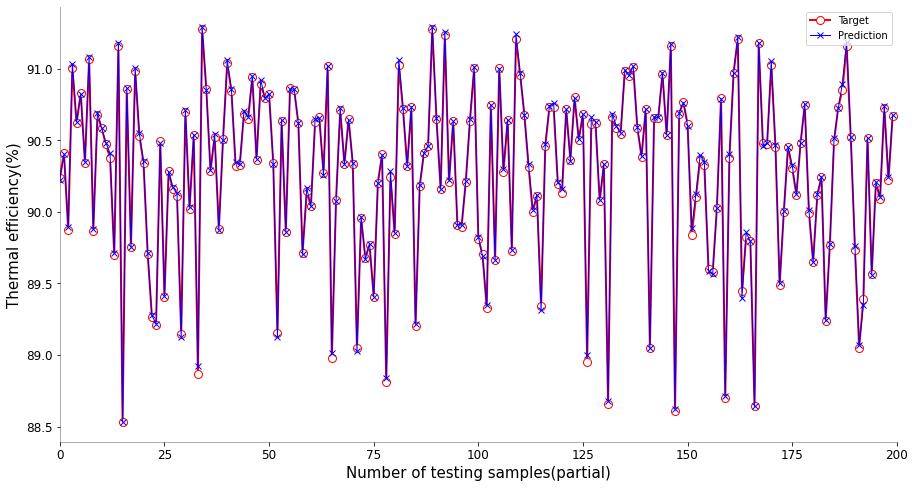

In [14]:
## Anti-normalization
inverse_test_y = scaler.inverse_transform(test_yout.reshape(-1,1))
inverse_NetoutTest = scaler.inverse_transform(NetoutTest.reshape(-1,1))

## Select the sample points
test_yout2 = inverse_test_y[::15]
NetoutTest2 = inverse_NetoutTest[::15]

plt.figure(figsize = (15,8))
x1 = range(len(NetoutTest))
plt.plot(test_yout2,linewidth=2,marker='o',markerfacecolor='white',c='red',markersize = 8)
plt.plot(NetoutTest2,'blue',linewidth=1,marker='x')

ax=plt.gca()  
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['left'].set_alpha(0.4)
ax.spines['bottom'].set_alpha(0.4)

plt.xlabel('Number of testing samples(partial)',fontsize = 15)
plt.xlim(0,len(NetoutTest2))
plt.ylabel("Thermal efficiency(%)",fontsize=15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.legend(['Target','Prediction'], loc='upper right')
plt.show()

### 4.2 Plot the error curve

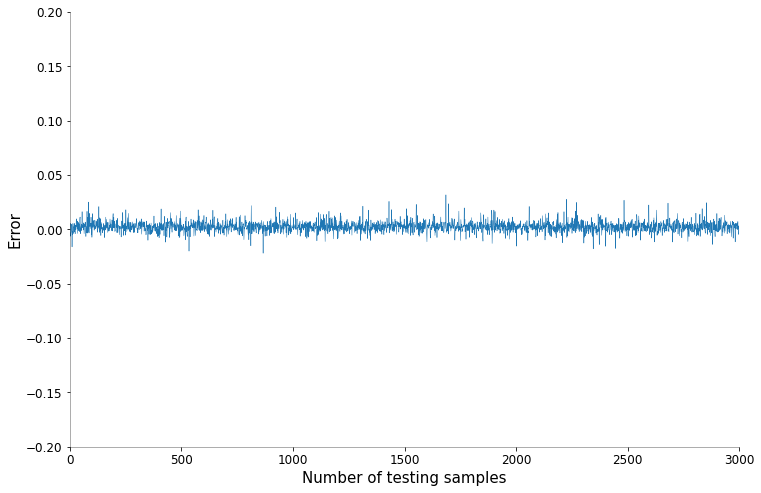

In [16]:
Curve5 = np.zeros(len(NetoutTest))
for i in range(len(NetoutTest)):
    Curve5[i] = (NetoutTest[i]-test_yout[i])

plt.figure(figsize = (12,8))
x1 = range(len(NetoutTest))
plt.plot(Curve5,linewidth=0.5,marker='None',markerfacecolor='white')

ax=plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['left'].set_alpha(0.4)
ax.spines['bottom'].set_alpha(0.4)

plt.xlabel('Number of testing samples',fontsize=15)
plt.xlim(0,len(NetoutTest))
plt.ylabel("Error",fontsize=15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.ylim(-0.2,0.2)
# plt.ylim(-0.5,0.5)
plt.show()